## 1. Import des librairies et définition des chemins

In [1]:
%pip install --quiet Pillow pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import random

In [6]:
from pathlib import Path
import os
import shutil
import random

# 1. Chemins source et destination corrigés
src_base = Path.home() / "Desktop" / "PFE" / "implimentation" /\
           "DiffFlow" / "DataSet_HES" / "random_patches_resize"
dst_base = Path.home() / "Desktop" / "PFE" / "implimentation" / "PNP_FM" / "dataHes"

# Vérification rapide
assert src_base.exists(), f"Le dossier source {src_base} n'existe pas !"
print("Source détectée :", src_base)

# 2. Copier 60% des images de chaque split
for split in ["train", "val", "test"]:
    src_split = src_base / split
    dst_split = dst_base / split
    os.makedirs(dst_split, exist_ok=True)
    slide_dirs = [d for d in os.listdir(src_split) 
                  if (src_split / d).is_dir()]
    for slide in slide_dirs:
        src_slide = src_split / slide
        dst_slide = dst_split / slide
        os.makedirs(dst_slide, exist_ok=True)
        imgs = [f for f in os.listdir(src_slide) 
                if f.lower().endswith(('.png','.jpg','.tif','.tiff'))]
        random.shuffle(imgs)
        n_keep = int(0.6 * len(imgs))
        for img in imgs[:n_keep]:
            shutil.copy2(src_slide / img, dst_slide / img)

print("✔ Nouveau dataset créé dans :", dst_base)


Source détectée : /home/salim/Desktop/PFE/implimentation/DiffFlow/DataSet_HES/random_patches_resize
✔ Nouveau dataset créé dans : /home/salim/Desktop/PFE/implimentation/PNP_FM/dataHes


In [13]:
import os

# Chemin racine vers votre nouveau dataset réduit
base_dir = os.path.expanduser("~/Desktop/PFE/implimentation/PNP_FM/dataHes")

# Pour chaque split, lister les dossiers de lames et afficher leur nombre
for split in ["train", "test", "val"]:
    split_dir = os.path.join(base_dir, split)
    # Vérifie que le dossier existe
    if not os.path.isdir(split_dir):
        print(f"⚠️  Le dossier {split_dir!r} n'existe pas.")
        continue

    slide_dirs = sorted([
        d for d in os.listdir(split_dir)
        if os.path.isdir(os.path.join(split_dir, d))
    ])
    print(f"Nombre de lames détectées dans '{split}' : {len(slide_dirs)}")


Nombre de lames détectées dans 'train' : 21
Nombre de lames détectées dans 'test' : 2
Nombre de lames détectées dans 'val' : 2


In [14]:
import os
import pandas as pd

# Racine de votre dataset réduit
base_dir = os.path.expanduser("~/Desktop/PFE/implimentation/PNP_FM/dataHes")

records = []
total_images = {}

# Parcours des splits
for split in ["train", "val", "test"]:
    split_dir = os.path.join(base_dir, split)
    # Vérif et liste des lames
    if not os.path.isdir(split_dir):
        print(f"⚠️  {split_dir!r} n'existe pas, je passe.")
        continue

    slide_dirs = sorted(d for d in os.listdir(split_dir)
                        if os.path.isdir(os.path.join(split_dir, d)))
    split_count = 0

    for slide in slide_dirs:
        slide_path = os.path.join(split_dir, slide)
        # tous les formats d'images courants
        imgs = [f for f in os.listdir(slide_path)
                if f.lower().endswith((".png", ".jpg", ".jpeg", ".tif", ".tiff"))]
        n = len(imgs)
        split_count += n

        records.append({
            "split": split,
            "lame": slide,
            "n_images": n,
            "path": slide_path
        })

    total_images[split] = split_count

# Affichage des totaux
for split, cnt in total_images.items():
    print(f"Nombre total d'images dans '{split}' : {cnt}")
print("Nombre total d'images (tous splits confondus) :", sum(total_images.values()))

# Construction du DataFrame résumé
df_summary = pd.DataFrame(records)
df_summary


Nombre total d'images dans 'train' : 24285
Nombre total d'images dans 'val' : 2547
Nombre total d'images dans 'test' : 3146
Nombre total d'images (tous splits confondus) : 29978


,split,lame,n_images,path
0,train,100D_patches,604,/home/salim/Desktop/PFE/implimentation/PNP_FM/...
1,train,105D_patches,1133,/home/salim/Desktop/PFE/implimentation/PNP_FM/...
2,train,18A_patches,1671,/home/salim/Desktop/PFE/implimentation/PNP_FM/...
3,train,219A_patches,950,/home/salim/Desktop/PFE/implimentation/PNP_FM/...
4,train,222A_patches,1350,/home/salim/Desktop/PFE/implimentation/PNP_FM/...
5,train,22D_patches,1276,/home/salim/Desktop/PFE/implimentation/PNP_FM/...
6,train,25B_patches,1758,/home/salim/Desktop/PFE/implimentation/PNP_FM/...
7,train,25F_patches,1542,/home/salim/Desktop/PFE/implimentation/PNP_FM/...
8,train,27A_patches,1146,/home/salim/Desktop/PFE/implimentation/PNP_FM/...
9,train,42A_patches,784,/home/salim/Desktop/PFE/implimentation/PNP_FM/...


In [15]:
df_summary["n_images"].describe()



count      25.000000
mean     1199.120000
std       343.686548
min       604.000000
25%       940.000000
50%      1276.000000
75%      1371.000000
max      1758.000000
Name: n_images, dtype: float64

In [16]:
res_records = []
for slide, row in df_summary.iterrows():
    for fname in os.listdir(row["path"]):
        if not fname.lower().endswith(".jpg"):
            continue
        img = Image.open(os.path.join(row["path"], fname))
        res_records.append({
            "lame": row["lame"],
            "filename": fname,
            "width": img.width,
            "height": img.height,
            "mode": img.mode
        })

df_res = pd.DataFrame(res_records)
# Statistiques globales
print("Résolutions uniques :", df_res[["width","height"]].drop_duplicates().values)
print(df_res[["width","height"]].describe())


Résolutions uniques : [[256 256]]
         width   height
count  29978.0  29978.0
mean     256.0    256.0
std        0.0      0.0
min      256.0    256.0
25%      256.0    256.0
50%      256.0    256.0
75%      256.0    256.0
max      256.0    256.0


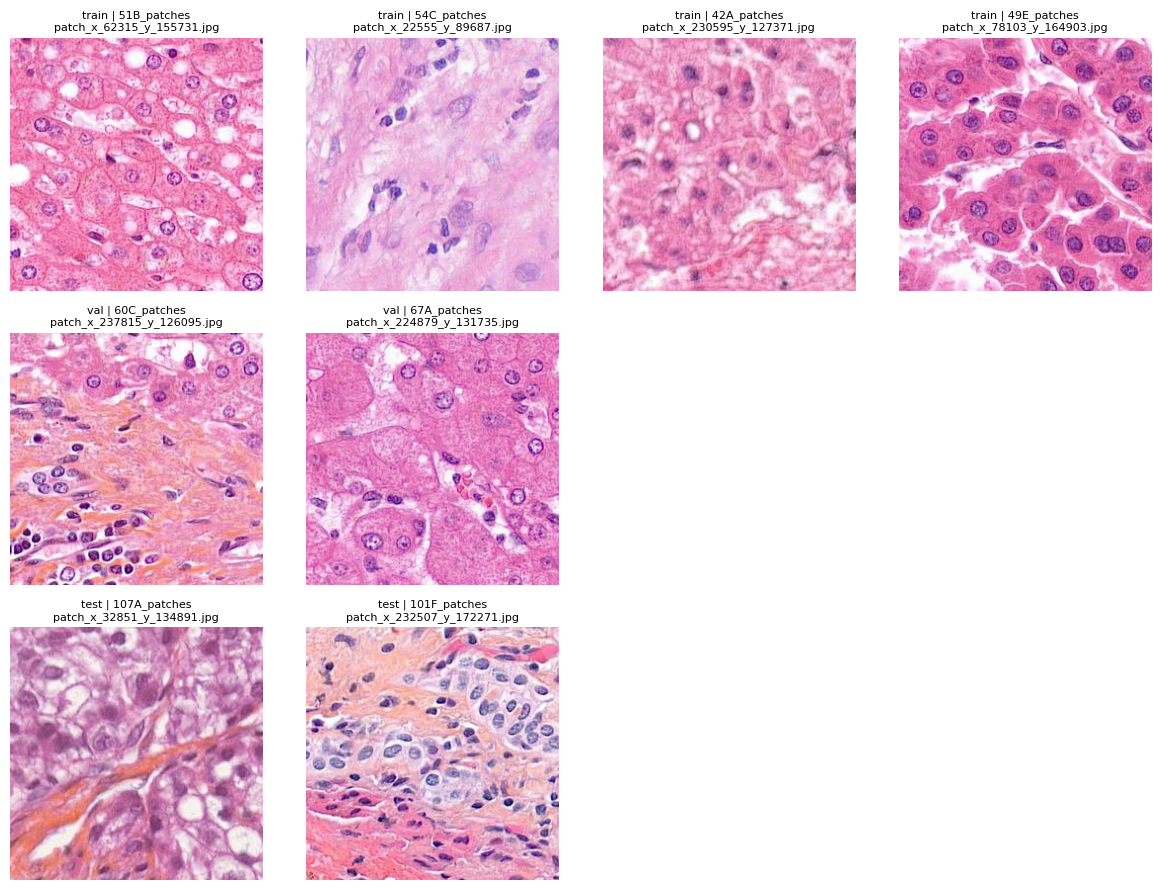

In [21]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Racine de votre dataset réduit
base_dir = os.path.expanduser("~/Desktop/PFE/implimentation/PNP_FM/dataHes")
splits   = ["train", "val", "test"]
n_samples = 4

# On crée une grille de plots : 3 lignes (splits) × n_samples colonnes
fig, axes = plt.subplots(len(splits), n_samples,
                         figsize=(n_samples*3, len(splits)*3))

for row, split in enumerate(splits):
    split_dir = os.path.join(base_dir, split)
    # liste des dossiers de lames
    slide_dirs = [d for d in os.listdir(split_dir)
                  if os.path.isdir(os.path.join(split_dir, d))]
    # on en prend n_samples au maximum
    picked_slides = random.sample(slide_dirs, min(n_samples, len(slide_dirs)))

    for col, slide in enumerate(picked_slides):
        slide_path = os.path.join(split_dir, slide)
        # tous les types d’images courants
        imgs = [f for f in os.listdir(slide_path)
                if f.lower().endswith((".png", ".jpg", ".jpeg",
                                       ".tif", ".tiff"))]
        if not imgs:
            axes[row, col].axis("off")
            continue

        img_file = random.choice(imgs)
        img = Image.open(os.path.join(slide_path, img_file))

        ax = axes[row, col]
        ax.imshow(img)
        ax.set_title(f"{split} | {slide}\n{img_file}", fontsize=8)
        ax.axis("off")

    # si slide_dirs < n_samples, masquer les colonnes vides
    for col in range(len(picked_slides), n_samples):
        axes[row, col].axis("off")

plt.tight_layout()
plt.show()


In [19]:
#!/usr/bin/env python3
import os

# ← Adaptez ces chemins si besoin
train_dir = os.path.expanduser(
    "~/Desktop/PFE/implimentation/PNP_FM/dataHes/train")
val_dir   = os.path.expanduser(
    "~/Desktop/PFE/implimentation/PNP_FM/dataHes/val")
test_dir  = os.path.expanduser(
    "~/Desktop/PFE/implimentation/PNP_FM/dataHes/test")

def count_images(directory,
                 exts=(".png", "jpg", "jpeg", "bmp", "tif", "tiff")):
    """Compte récursivement tous les fichiers terminant par une extension image."""
    total = 0
    for root, _, files in os.walk(directory):
        total += sum(1 for f in files if f.lower().endswith(exts))
    return total

if __name__ == "__main__":
    n_train = count_images(train_dir)
    n_val   = count_images(val_dir)
    n_test  = count_images(test_dir)
    total   = n_train + n_val + n_test

    print(f"Total images           : {total}")
    if total > 0:
        print(f"Train      : {n_train} ({n_train/total*100:.2f}%)")
        print(f"Validation : {n_val}   ({n_val/total*100:.2f}%)")
        print(f"Test       : {n_test}   ({n_test/total*100:.2f}%)")
    else:
        print("Aucune image trouvée dans les répertoires spécifiés.")


Total images           : 29978
Train      : 24285 (81.01%)
Validation : 2547   (8.50%)
Test       : 3146   (10.49%)
